In [24]:
import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
# Import API key
import api_keys


In [25]:
# list for holding lat_lngs and cities
lat_lngs = []
cities = []

In [26]:
# generating random list of lat and lon
lat_range = (-90, 90)
lng_range = (-180, 180)
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)

In [27]:
# looping thru lat_lng and we're going to find the nearest city
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
print(len(cities))

608


In [28]:
api_key = api_keys.api_key

# build base URL for weather API call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

city_data = []

# loop thru all cities in cities list
for i, city_name in enumerate(cities):
    # creating full URL for API request
    city_url = url + "&q=" + city_name
    # run API request
    # use try statement, so that if the request comes back as N/A
    # the loop wont break
    try:
        print(f"Requesting data for {city_name}")
        # make request with city data
        city_weather = requests.get(city_url).json()
        # parse request data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =  city_weather["dt"]
        # append city information into city_data list
        city_data.append({
            "City": city_name,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })
        
    # if an error experienced, skip
    except:
        print("city not found. Skipping")

Requesting data for ushuaia
Requesting data for hilo
Requesting data for kapaa
Requesting data for san antonio
Requesting data for nacozari
Requesting data for busselton
Requesting data for bredasdorp
Requesting data for saskylakh
Requesting data for saldanha
Requesting data for hermanus
Requesting data for clyde river
Requesting data for aklavik
Requesting data for sur
Requesting data for fuzhou
Requesting data for san cristobal
Requesting data for bluff
Requesting data for palabuhanratu
city not found. Skipping
Requesting data for grand gaube
Requesting data for esperance
Requesting data for butaritari
Requesting data for varkaus
Requesting data for nioro
Requesting data for tiksi
Requesting data for barbar
city not found. Skipping
Requesting data for ciudad real
Requesting data for mys shmidta
city not found. Skipping
Requesting data for palmer
Requesting data for kavieng
Requesting data for samusu
city not found. Skipping
Requesting data for huarmey
Requesting data for velesin
Requ

Requesting data for jertih
Requesting data for zabid
Requesting data for bilibino
Requesting data for roma
Requesting data for zharkent
Requesting data for dudinka
Requesting data for saleaula
city not found. Skipping
Requesting data for sao jose da coroa grande
Requesting data for bulgan
Requesting data for cabedelo
Requesting data for dunedin
Requesting data for camana
city not found. Skipping
Requesting data for grand river south east
city not found. Skipping
Requesting data for komsomolskiy
Requesting data for bubaque
Requesting data for yar-sale
Requesting data for hami
Requesting data for pochutla
Requesting data for port lincoln
Requesting data for madulao
Requesting data for tonekabon
Requesting data for bundaberg
Requesting data for opuwo
Requesting data for kodiak
Requesting data for milazzo
Requesting data for alyangula
Requesting data for santa cruz do rio pardo
Requesting data for belushya guba
city not found. Skipping
Requesting data for vardo
Requesting data for minab
Re

Requesting data for alappuzha
city not found. Skipping
Requesting data for zhongshan
Requesting data for maltahohe
Requesting data for whitehorse
Requesting data for maceio
Requesting data for serowe
Requesting data for hay river
Requesting data for tabiauea
city not found. Skipping
Requesting data for coihaique
Requesting data for namikupa
Requesting data for bharatpur
Requesting data for calama
Requesting data for shubarkuduk
Requesting data for margate
Requesting data for shymkent
Requesting data for kargil
Requesting data for kamenskoye
city not found. Skipping
Requesting data for la rioja
Requesting data for bartlesville
Requesting data for stephenville
Requesting data for high level
Requesting data for kiama
Requesting data for priyutnoye
Requesting data for yakima
Requesting data for nyrob
Requesting data for barabai
Requesting data for kodinsk
Requesting data for formoso do araguaia
city not found. Skipping
Requesting data for kryvyy rih
Requesting data for inuvik
Requesting da

In [29]:
# convert city_data into pandas dataframe

city_data_df = pd.DataFrame(city_data)
city_data_df.head()
# Extract relevant fields from the data frame
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



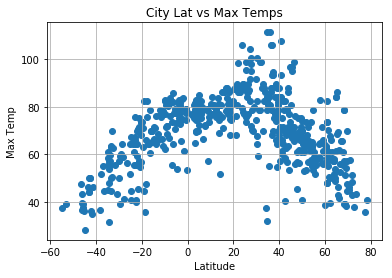

In [30]:
plt.scatter(
    lats,
    max_temps
)
plt.title("City Lat vs Max Temps")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Lat vs Max Temps.png")
plt.show()

# Observation = highest temps are bet 20 and 40 lat.  
#The latitudes in between -60 AND -20 are generally have colder climates are located in the southern hemisphere. 
#Likewise with the latitudes between 60 and 80 are colder, which correspond to cities near northern hemisphere (northpole)


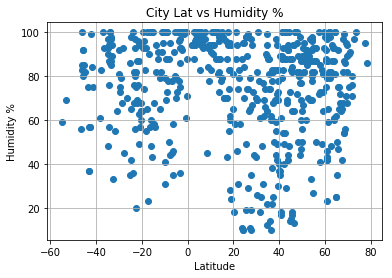

In [31]:
plt.scatter(
    lats,
    humidity
)
plt.title("City Lat vs Humidity %")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Lat vs Humidity.png")
plt.show()

#There are sprinkles of high levels of humidity across all latitudes, but it seems as there are more humidity in the northern hemisphere,
#but could be due to just the higher number of cities in our sample from the northern hemisphere.

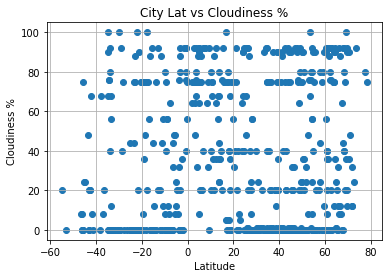

In [32]:
plt.scatter(
    lats,
    cloudiness
)
plt.title("City Lat vs Cloudiness %")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Lat vs Cloudiness.png")
plt.show()

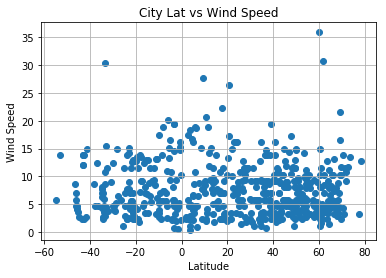

In [33]:
plt.scatter(
    lats,
    wind_speed
)
plt.title("City Lat vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("City Lat vs Wind Speed.png")
plt.show()


In [34]:
city_data_df.to_csv('citydatapull.csv')

In [35]:
#Observation #1
#There are sprinkles of high levels of humidity across all latitudes, but it seems as there are more humidity in the northern hemisphere,
#but could be due to just the higher number of cities in our sample from the northern hemisphere

#Observation #2
#There are sprinkles of high levels of humidity across all latitudes, but it seems as there are more humidity in the northern hemisphere,
#but could be due to just the higher number of cities in our sample from the northern hemisphere.

#Observation #3
#The majority of cities in our sample have wind speed ranging from 0-20 mph, but there are a couple of outliers that experience
#wind speed in excess of 20 mph. And only 4 cities have experienced more than 30 mph!